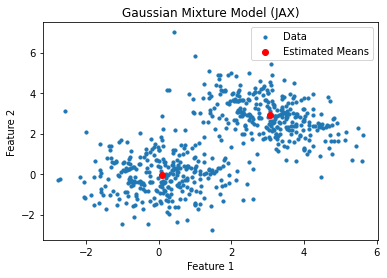

Estimated Means: [[ 3.072417    2.911351  ]
 [ 0.08150003 -0.05692655]]
Estimated Covariances: [[[ 1.0503556  -0.52739215]
  [-0.52739215  0.99307716]]

 [[ 1.0620824   0.00883957]
  [ 0.00883957  0.97979754]]]
Estimated Weights: [0.49864003 0.50135994]


Array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from nanodl import GaussianMixtureModel

# Generate synthetic data using JAX
def generate_data(seed=0):
    key = jax.random.PRNGKey(seed)
    n_samples = 300
    mean1 = jnp.array([0, 0])
    cov1 = jnp.array([[1, 0], [0, 1]])
    data1 = jax.random.multivariate_normal(key, mean1, cov1, (n_samples,))

    mean2 = jnp.array([3, 3])
    cov2 = jnp.array([[1, -0.5], [-0.5, 1]])
    data2 = jax.random.multivariate_normal(key, mean2, cov2, (n_samples,))

    X = jnp.vstack([data1, data2])
    return X

# Generate data
X = generate_data()

# Fit the model
gmm = GaussianMixtureModel(n_components=2, seed=42)
gmm.fit(X)

# Plot the data and the estimated means
plt.scatter(X[:, 0], X[:, 1], s=10, label='Data')
plt.scatter(gmm.means[:, 0], gmm.means[:, 1], color='red', label='Estimated Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Gaussian Mixture Model (JAX)')
plt.show()

# Print estimated parameters
print("Estimated Means:", gmm.means)
print("Estimated Covariances:", gmm.covariances)
print("Estimated Weights:", gmm.weights)

labels = gmm.predict(X)
labels


In [3]:
from nanodl import PCA

# Create dummy data
data = jax.random.normal(jax.random.key(0), (1000, 10))

# Create an instance of the PCA class
pca = PCA(n_components=2)

# Fit the model
pca.fit(data)

# Transform the data to the new lower dimension space
transformed_data = pca.transform(data)

# Inverse transform the data to the original space
original_data = pca.inverse_transform(transformed_data)

# Sample from the model
X_sampled = pca.sample(n_samples=1000, key=None)

print(X_sampled.shape, original_data.shape, transformed_data.shape)

(1000, 10) (1000, 10) (1000, 2)


In [4]:
from nanodl import LogisticRegression

num_samples = 100
input_dim = 2

x_data = jax.random.normal(jax.random.PRNGKey(0), (num_samples, input_dim))
logits = jnp.dot(x_data, jnp.array([0.5, -0.5])) - 0.1
y_data = (logits > 0).astype(jnp.float32)

lr_model = LogisticRegression(input_dim)
lr_model.train(x_data, y_data)

test_data = jax.random.normal(jax.random.PRNGKey(0), (num_samples, input_dim))
predictions = lr_model.predict(test_data)
print("Predictions:", predictions)

Epoch 1, Loss: 0.6744
Epoch 2, Loss: 0.6568
Epoch 3, Loss: 0.6402
Epoch 4, Loss: 0.6246
Epoch 5, Loss: 0.6099
Epoch 6, Loss: 0.5960
Epoch 7, Loss: 0.5830
Epoch 8, Loss: 0.5706
Epoch 9, Loss: 0.5590
Epoch 10, Loss: 0.5479
Epoch 11, Loss: 0.5375
Epoch 12, Loss: 0.5276
Epoch 13, Loss: 0.5182
Epoch 14, Loss: 0.5093
Epoch 15, Loss: 0.5008
Epoch 16, Loss: 0.4928
Epoch 17, Loss: 0.4851
Epoch 18, Loss: 0.4777
Epoch 19, Loss: 0.4707
Epoch 20, Loss: 0.4640
Epoch 21, Loss: 0.4576
Epoch 22, Loss: 0.4515
Epoch 23, Loss: 0.4456
Epoch 24, Loss: 0.4400
Epoch 25, Loss: 0.4346
Epoch 26, Loss: 0.4294
Epoch 27, Loss: 0.4244
Epoch 28, Loss: 0.4196
Epoch 29, Loss: 0.4150
Epoch 30, Loss: 0.4105
Epoch 31, Loss: 0.4062
Epoch 32, Loss: 0.4020
Epoch 33, Loss: 0.3980
Epoch 34, Loss: 0.3941
Epoch 35, Loss: 0.3904
Epoch 36, Loss: 0.3867
Epoch 37, Loss: 0.3832
Epoch 38, Loss: 0.3798
Epoch 39, Loss: 0.3765
Epoch 40, Loss: 0.3733
Epoch 41, Loss: 0.3702
Epoch 42, Loss: 0.3672
Epoch 43, Loss: 0.3642
Epoch 44, Loss: 0.36